# Customer Segmentation and Personality Analysis Using KMeans Clustering

In this project, I worked on customer segmentation using unsupervised learning, specifically the KMeans clustering algorithm. The dataset included demographic and behavioral information such as age, income, education, marital status, and spending in different product categories.

I started by exploring and cleaning the data, dealing with missing values, and encoding categorical variables. Then I applied feature scaling to prepare the data and used the Elbow Method to determine the optimal number of clusters. After running the KMeans algorithm, I used PCA to reduce the data’s dimensions and visualized the clusters in two dimensions.

This project gave me a hands-on understanding of how unsupervised learning can be applied in real-life scenarios, especially in customer behavior analysis and marketing. I used Python libraries such as pandas, seaborn, matplotlib, scikit-learn, yellowbrick and PCA for analysis and visualization.


### Project Timeline:

- Importing Required Libraries  
- Data Loading & Initial Exploration  
- Exploratory Data Analysis (EDA)  
- Data Cleaning and Feature Engineering  
- Feature Scaling and PCA for Dimensionality Reduction  
- Clustering with KMeans & Finding Optimal Clusters (Elbow Method)  
- Cluster Visualization and Interpretation  
- Summary of Customer Segments and Key Insights


#### Importing Libraries

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [395]:
df= pd.read_csv("marketing_campaign.csv",sep='\t')

In [396]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [397]:
df.shape

(2240, 29)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [399]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Data Analysis

In [400]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [401]:
mean= df['Income'].mean()
df['Income']= df['Income'].fillna(mean)

Let us create a new column Age by using year of birth

In [402]:
df['Age']= 2022-df['Year_Birth']

In [403]:
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

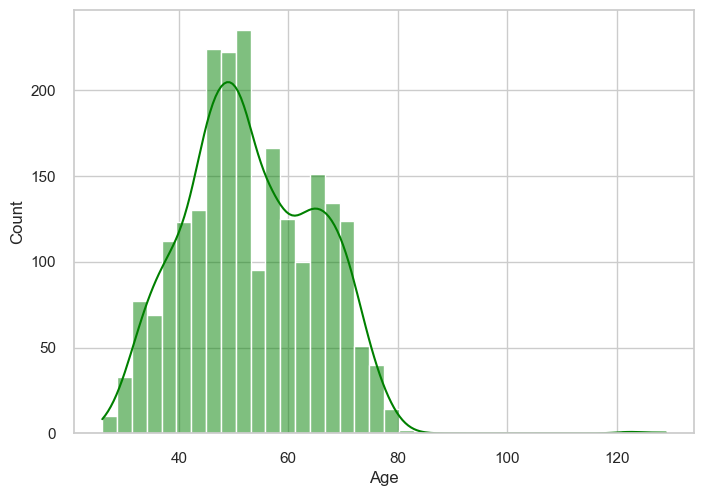

In [404]:
sns.histplot(df['Age'],color='green',kde=True)

In [405]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

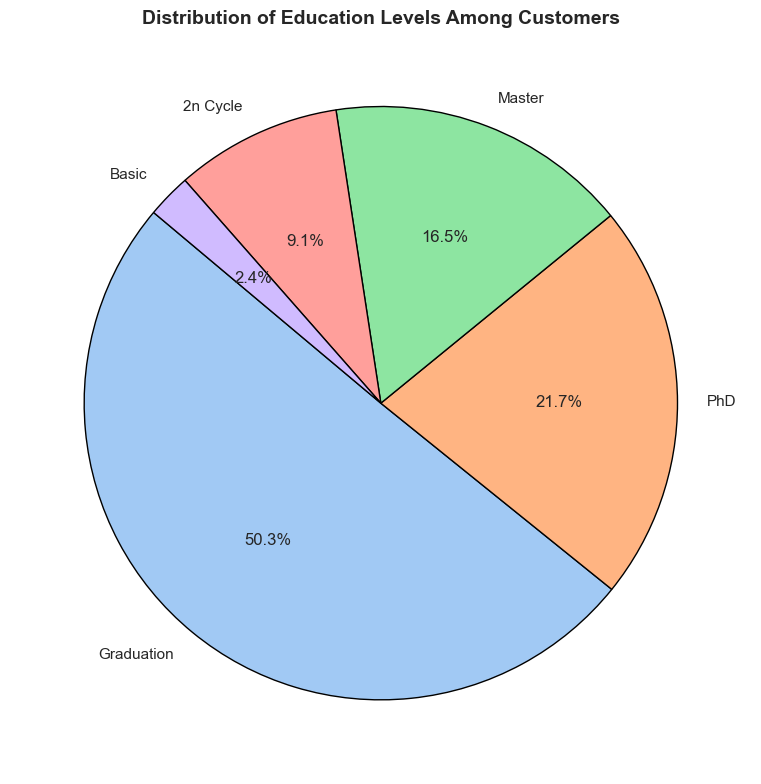

In [406]:
education_counts = df['Education'].value_counts()
labels = education_counts.index.tolist()
colors = sns.color_palette('pastel')[0:len(labels)]

plt.figure(figsize=(8, 8))
plt.pie(
    education_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Education Levels Among Customers", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

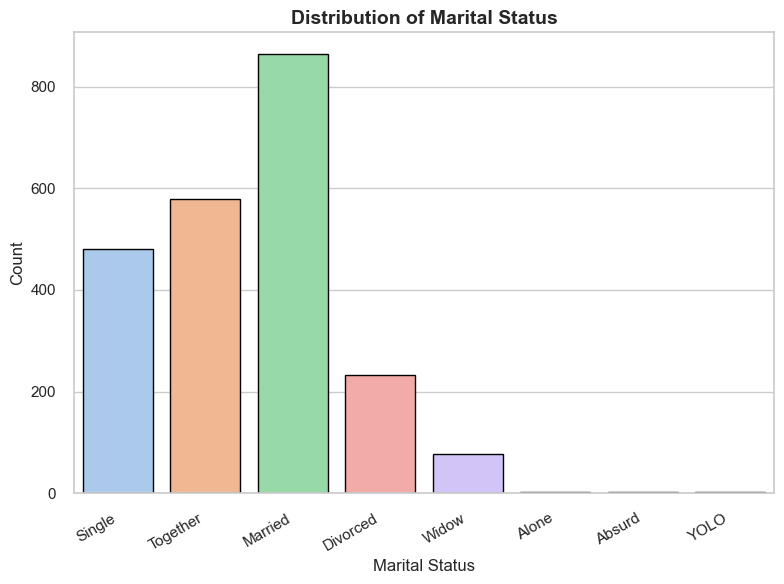

In [407]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

ms = sns.countplot(x='Marital_Status', data=df, hue='Marital_Status', palette='pastel', edgecolor='black', legend=False)

ms.set_xticklabels(ms.get_xticklabels(), rotation=30, ha='right')

plt.title("Distribution of Marital Status", fontsize=14, fontweight='bold')
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


In [408]:
df_raw = pd.read_csv("marketing_campaign.csv",sep='\t')

<Axes: xlabel='Income', ylabel='Count'>

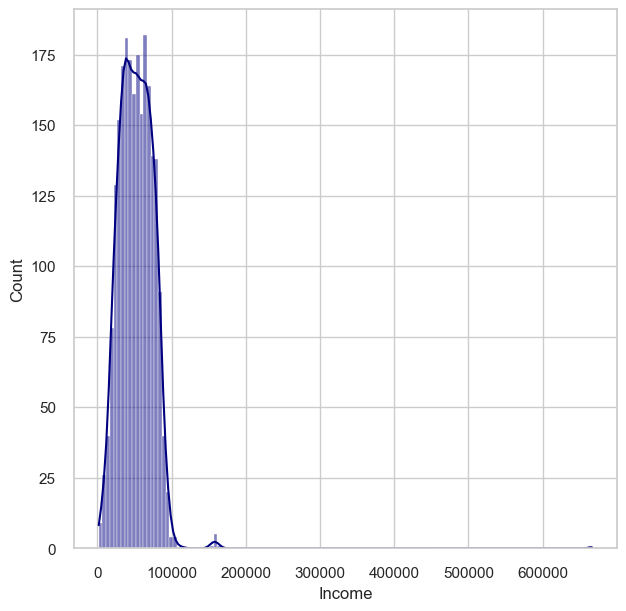

In [409]:
plt.figure(figsize=(7,7))
sns.histplot(df['Income'],color='navy',kde=True)

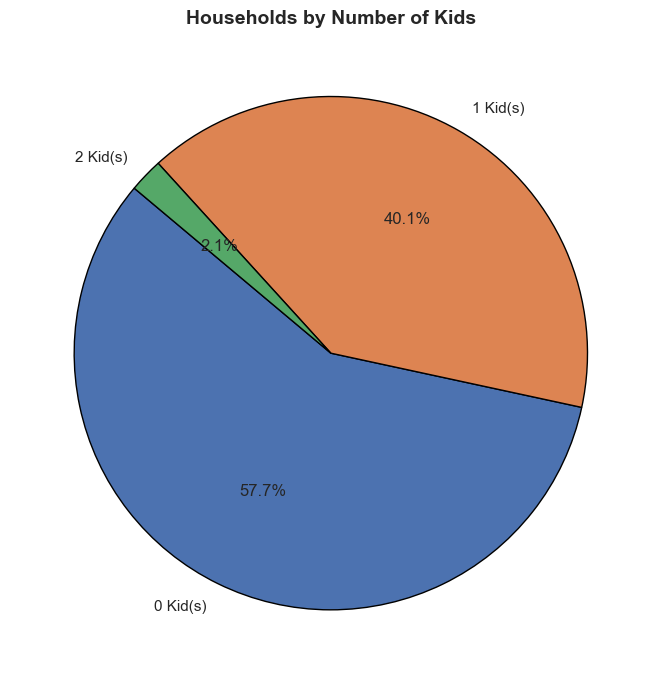

In [410]:
plt.figure(figsize=(7, 7))

kid_counts = df['Kidhome'].value_counts().sort_index()
labels = [f"{k} Kid(s)" for k in kid_counts.index]

plt.pie(
    kid_counts,
    labels=labels,
    autopct='%.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Households by Number of Kids", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


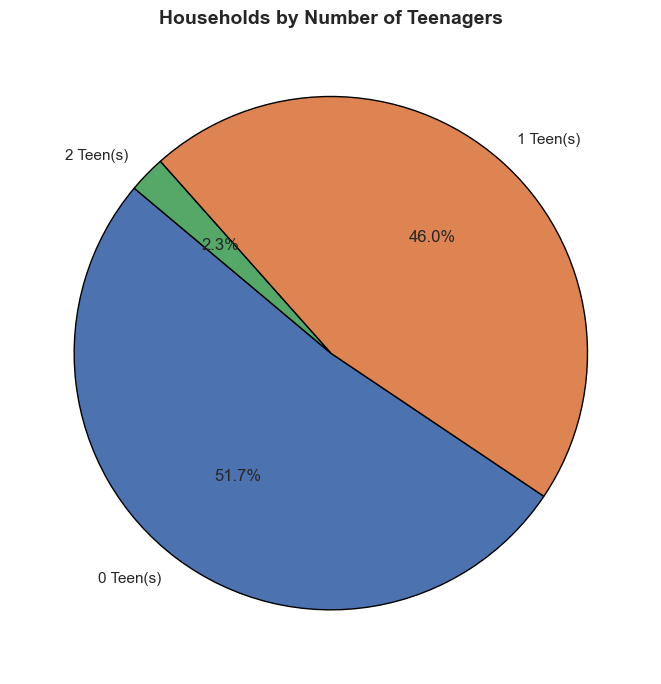

In [411]:
plt.figure(figsize=(7, 7))

teen_counts = df['Teenhome'].value_counts().sort_index()
labels = [f"{t} Teen(s)" for t in teen_counts.index]

plt.pie(
    teen_counts,
    labels=labels,
    autopct='%.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Households by Number of Teenagers", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


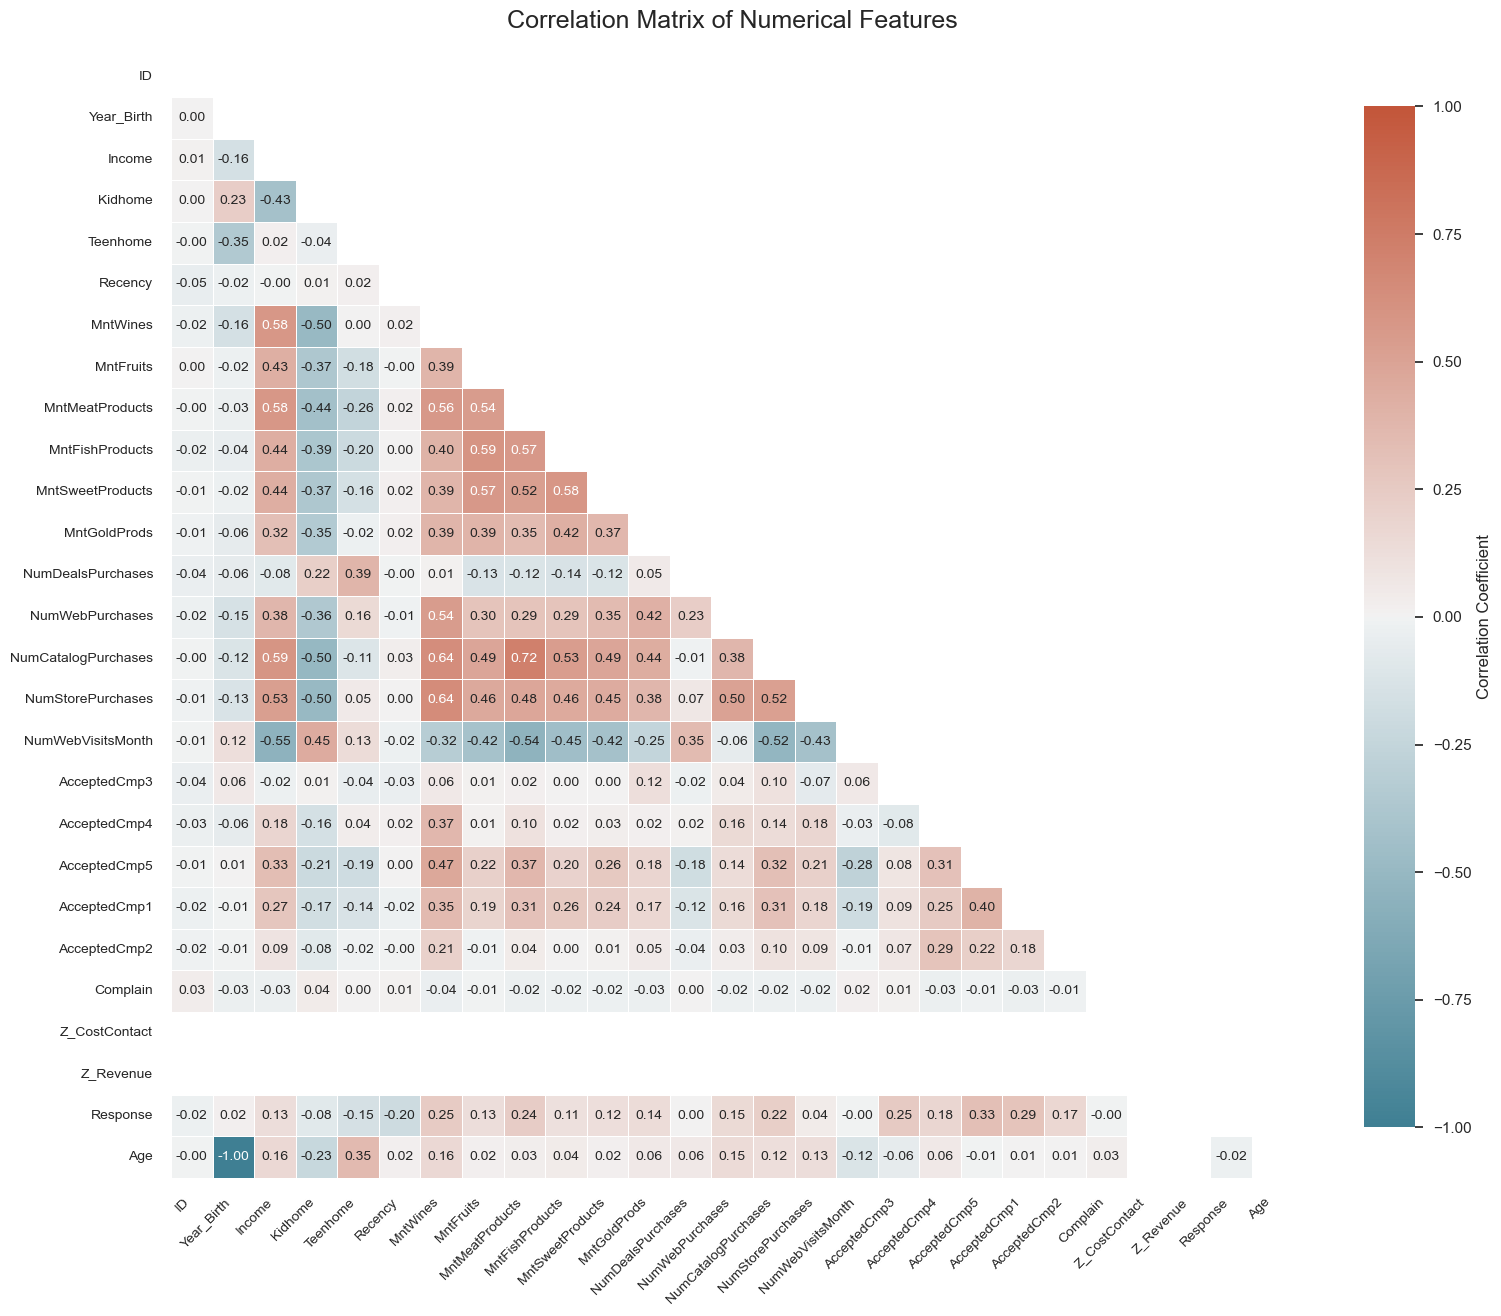

In [412]:
# Calculate correlation matrix
corr = df.select_dtypes(include='number').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(style='white')

plt.figure(figsize=(16, 14))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.7,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix of Numerical Features', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

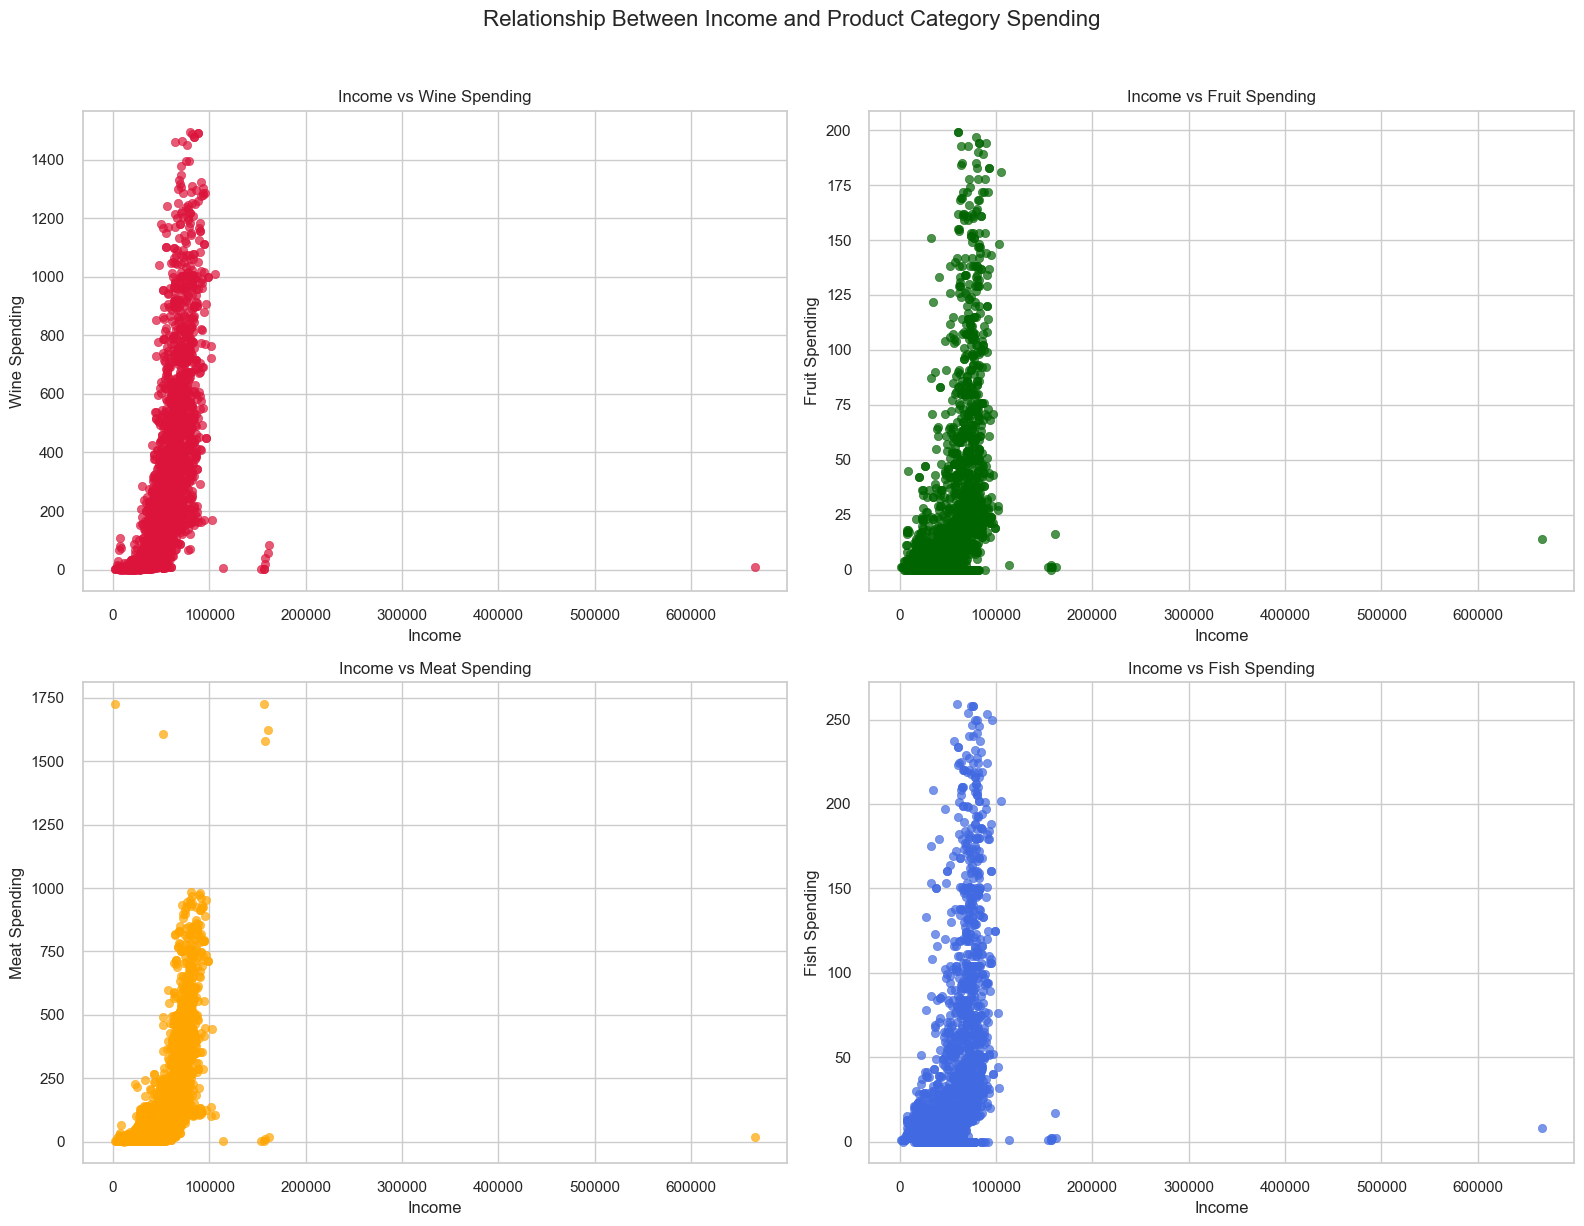

In [413]:

plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Income', y='MntWines', color='crimson', alpha=0.7, edgecolor=None)
plt.title('Income vs Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Income', y='MntFruits', color='darkgreen', alpha=0.7, edgecolor=None)
plt.title('Income vs Fruit Spending')
plt.xlabel('Income')
plt.ylabel('Fruit Spending')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Income', y='MntMeatProducts', color='orange', alpha=0.7, edgecolor=None)
plt.title('Income vs Meat Spending')
plt.xlabel('Income')
plt.ylabel('Meat Spending')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Income', y='MntFishProducts', color='royalblue', alpha=0.7, edgecolor=None)
plt.title('Income vs Fish Spending')
plt.xlabel('Income')
plt.ylabel('Fish Spending')

plt.suptitle('Relationship Between Income and Product Category Spending', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

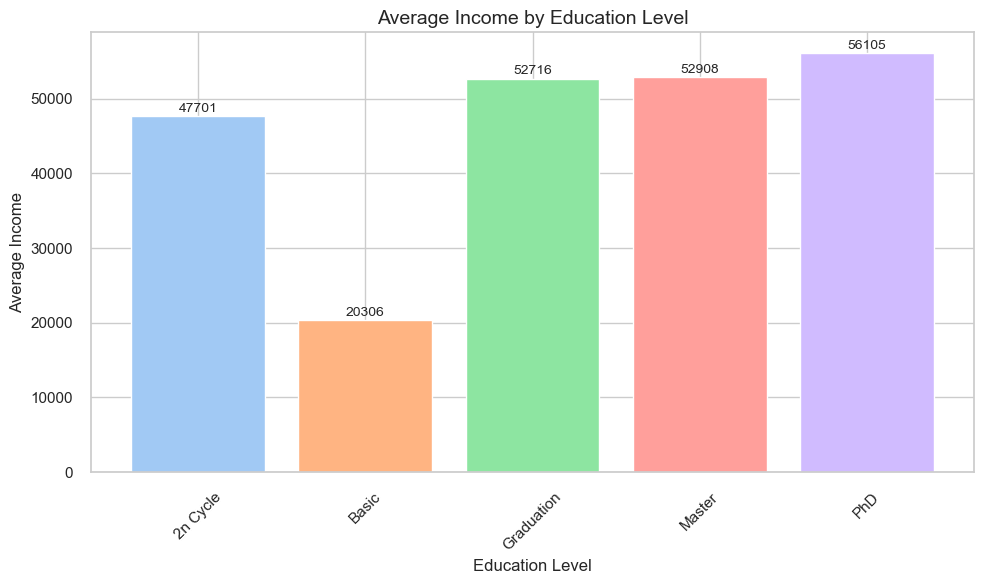

In [414]:
# Compute average income by education level
education_income = df.groupby('Education')['Income'].mean().round(2)

# Set plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")

# Create bar plot
bars = plt.bar(education_income.index, education_income.values, color=colors)

# Annotate values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{yval:.0f}', ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Average Income by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Cleaning and Feature Engineering

In [415]:
mean

52247.25135379061

In [416]:
df= df.dropna()  ## we replaced the income null values with avg or mean of income

In [417]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

Creating extra features like total money spent, family size

In [418]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [419]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    df["Relation"] = df["Marital_Status"].replace({
        "Married": 2, "Together": 2, "Absurd": 1, "Widow": 1,
        "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1
    }).astype(int)

    df["Children"] = df["Kidhome"] + df["Teenhome"]
    df["Family_Size"] = df["Relation"] + df["Children"]


In [420]:
df= df.drop(['Relation','Children'],axis=1)

In [421]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spent', 'Family_Size'],
      dtype='object')

Label Encoding categorical data i.e. Education data

In [422]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

In [423]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [424]:
lb = LabelEncoder()
df['Education']= lb.fit_transform(df['Education'])

In [425]:
df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

Scaling Data

In [426]:
df1 = df.copy()
to_drop = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1","AcceptedCmp2", "Complain", "Response", ]
df1 = df1.drop(to_drop, axis=1)

In [427]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_Spent,Family_Size
0,5524,1957,2,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,3,11,65,1617,1
1,2174,1954,2,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,3,11,68,27,3
2,4141,1965,2,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,3,11,57,776,2
3,6182,1984,2,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,3,11,38,53,3
4,5324,1981,4,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,3,11,41,422,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Married,61223.0,0,1,13-06-2013,46,709,...,2,9,3,4,5,3,11,55,1341,3
2236,4001,1946,4,Together,64014.0,2,1,10-06-2014,56,406,...,7,8,2,5,7,3,11,76,444,5
2237,7270,1981,2,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,2,3,13,6,3,11,41,1241,1
2238,8235,1956,3,Together,69245.0,0,1,24-01-2014,8,428,...,2,6,5,10,3,3,11,66,843,3


In [428]:
scaler = StandardScaler()
#scaled_feature = scaler.fit_transform(df.values)
#scaled_df = pd.DataFrame(scaled_feature, index=df.index, columns=df.columns)

In [429]:
df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

## Aproach 1: Unsupervised Learning

## Perform Clustering

We will use the Elbob method to find the optimum number of clusters

In [430]:
!pip install yellowbrick # Install yellowbrick for visualizing clustering performance

ERROR: Invalid requirement: '#'


In [431]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [432]:
df= df.drop(['Marital_Status','Dt_Customer'],axis=1)

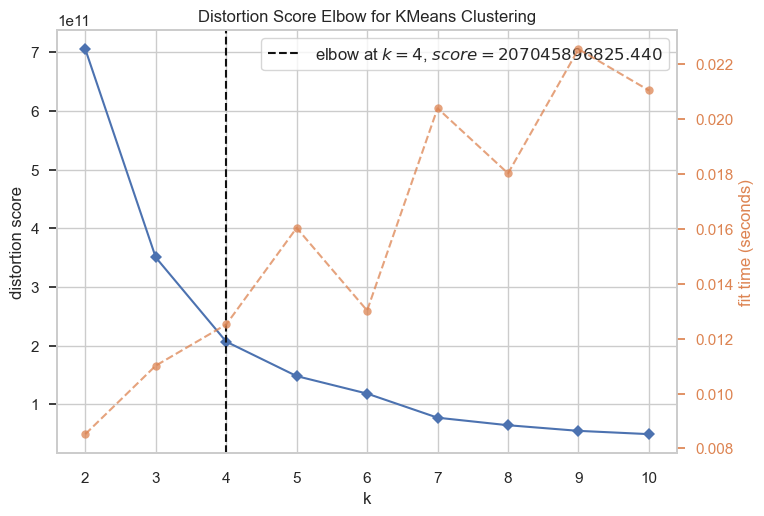

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [433]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
em = KElbowVisualizer(KMeans(), k=10)
em.fit(df)
em.show()

We see that the optimum number of clusters that should be used is k=4

We will use K Means Clutering for the operation

In [434]:
from sklearn.cluster import KMeans

In [435]:
kmc = KMeans(n_clusters=4)
# fit model and predict clusters
pred = kmc.fit_predict(df)
df["Clusters"] = pred

In [436]:
df['Clusters']

0       0
1       0
2       3
3       1
4       0
       ..
2235    0
2236    0
2237    0
2238    3
2239    0
Name: Clusters, Length: 2240, dtype: int32

Let us visualize our Clusters

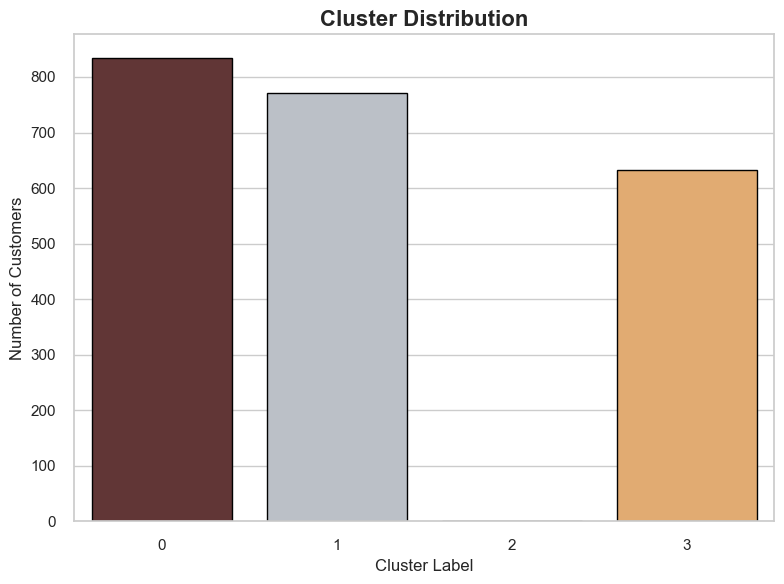

In [437]:
custom_palette = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="Clusters",
    hue="Clusters", 
    palette=custom_palette,
    edgecolor="black",
    legend=False
)

plt.title("Cluster Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Cluster Label", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


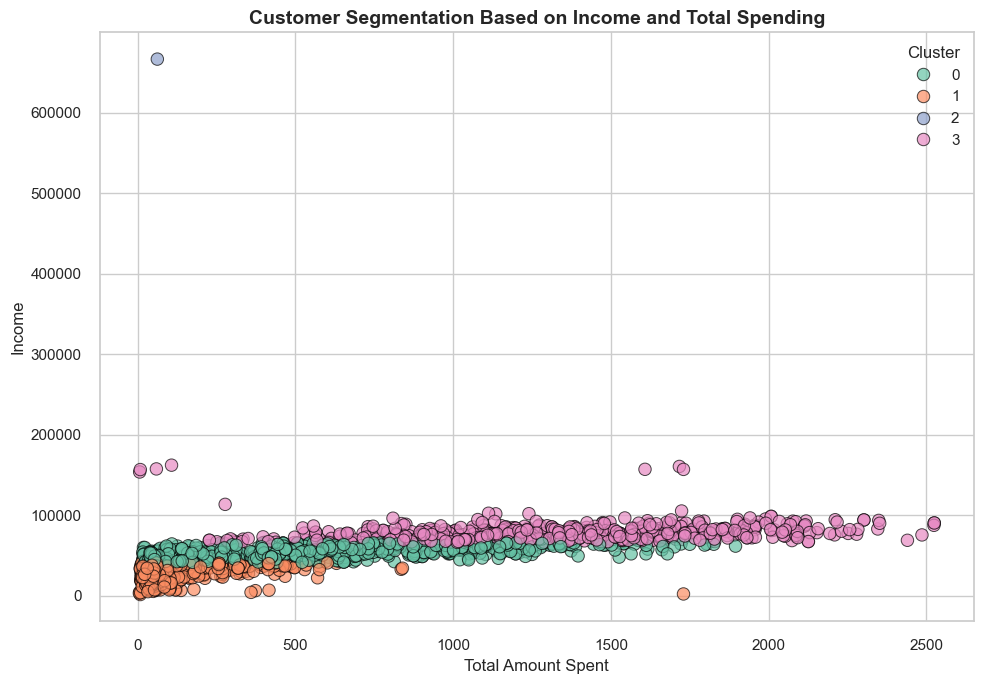

In [438]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")


fig = sns.scatterplot(
    data=df,
    x="Total_Spent",
    y="Income",
    hue="Clusters",
    palette="Set2",
    alpha=0.7,
    s=80,
    edgecolor="black"
)

fig.set_title("Customer Segmentation Based on Income and Total Spending", fontsize=14, fontweight="bold")
plt.xlabel("Total Amount Spent")
plt.ylabel("Income")
plt.legend(title="Cluster", loc='best')
plt.tight_layout()
plt.show()

## Additional Exploration: Supervised Learning

Although the main focus of this project is customer segmentation using unsupervised learning (KMeans), I briefly explored supervised machine learning algorithms (Decision Tree, KNN, Random Forest) to experiment with how well the resulting clusters or behavioral labels might be predicted in a future scenario where such labels are available or manually assigned.


## Approach 2 : Supervised Learning

In [439]:
y=df['Response'] ## dependent var
X_new=df.drop(['Response','Education'],axis=1) ## independent var

In [440]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1792, 29)
Shape of y_train =  (1792,)
Shape of X_test =  (448, 29)
Shape of y_test =  (448,)


### Decision Tree

In [441]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [442]:
classifier.score(X_test, y_test)

0.8258928571428571

### KNN

In [443]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8504464285714286

### Random Forest 

In [444]:
from sklearn.ensemble import RandomForestClassifier

In [445]:
rf= RandomForestClassifier()

In [446]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [447]:
rf.score(X_test,y_test)

0.8883928571428571

Note: This supervised learning section was an optional extension to test classification approaches. The main insights and conclusions of the project are based on the KMeans clustering analysis.


---

## Final Cluster Summary & Insights


In [448]:
# Let's check how many customers are in each cluster and their average total spending
cluster_analysis = df.groupby('Clusters').agg({
    'ID': 'count',
    'Income': 'mean',
    'Total_Spent': 'mean',
    'Age': 'mean',
    'Family_Size': 'mean'
}).rename(columns={
    'ID': 'Customer_Count',
    'Income': 'Avg_Income',
    'Total_Spent': 'Avg_Spending',
    'Age': 'Avg_Age',
    'Family_Size': 'Avg_Family_Size'
}).round(1)

cluster_analysis


,Customer_Count,Avg_Income,Avg_Spending,Avg_Age,Avg_Family_Size
Clusters,,,,,
0,835,53668.5,533.7,56.1,2.8
1,772,28846.3,99.1,49.1,2.8
2,1,666666.0,62.0,45.0,3.0
3,632,77982.0,1320.9,54.3,2.1


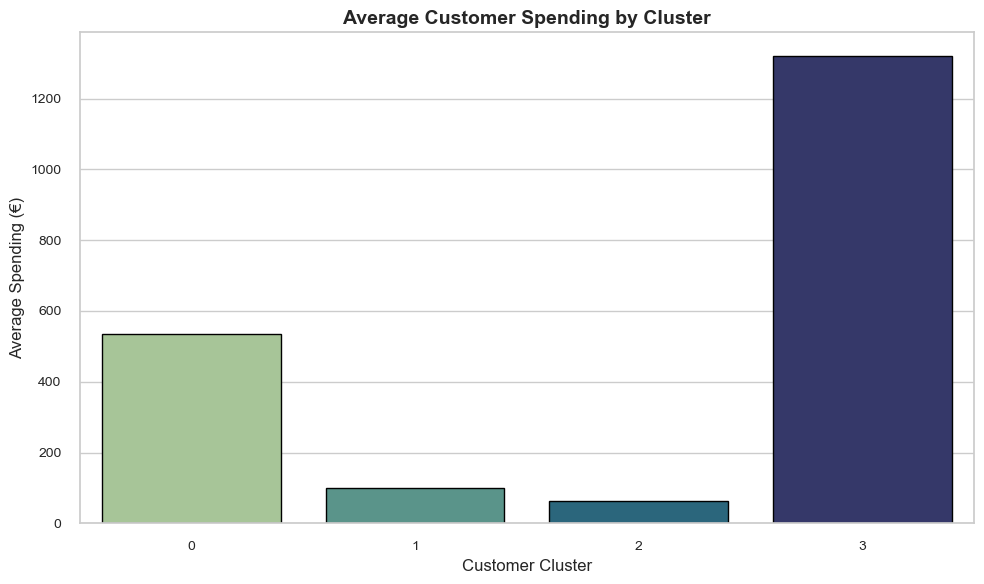

In [449]:
# Final Summary Visualization: Average Spending per Cluster
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(
    data=cluster_analysis.reset_index(), 
    x='Clusters', 
    y='Avg_Spending',
    hue='Clusters', 
    palette='crest', 
    edgecolor='black',
    legend=False
)
plt.title('Average Customer Spending by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Customer Cluster', fontsize=12)
plt.ylabel('Average Spending (€)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Final Interpretation

After running KMeans clustering, I found four main customer groups based on income, age, family size, and total amount spent.

- **Cluster 0**: Lower income and spending, with relatively older customers.
- **Cluster 1**: High spending, younger age, and smaller family size – likely loyal customers.
- **Cluster 2**: Moderate income and spending, with average age – typical customer profile.
- **Cluster 3**: Very high income and spending – possibly premium customers.

These insights can help in understanding customer behavior and tailoring marketing strategies accordingly.
